In [ ]:
# Prompt Chaining              - Blog Generation

# Topic -> LLM (Generate Outline)  -> LLM Generate Blog (use Topic + OUtline) -> Blog
# Start - gen_outline -> gen_blog -> End
# 
# States > topic + outline + blog 

In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.chat_models import init_chat_model

from typing import TypedDict
from dotenv import load_dotenv

In [ ]:
load_dotenv()

In [4]:
model = init_chat_model("gemini-2.5-flash",
                         model_provider="google_genai")

In [22]:
# creating the State

class BlogState(TypedDict):
    title: str
    outline: str
    content: str
    evaluation_score: str

In [7]:
def create_outline(state: BlogState) -> BlogState:

    # fetch Title
    title = state['title']

    # call llm to gen outline
    prompt = f"Generate a kids and elderly friendly outline for a blog on this title - {title}"
    outline = model.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [9]:
def create_blog(state: BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']

    prompt = f"Write Detailed Blog for {title} using the generated outline {outline}"

    content = model.invoke(prompt).content
    
    state['content'] = content

    return state

In [32]:
def evaluate_blog(state: BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']
    content = state['content']

    prompt = f"Give a numerical score form 1 to 10 to by blog {content} based on title {title} and outline {outline}."

    evaluate_blog = model.invoke(prompt)

    state['evaluation_score'] = evaluate_blog

    return state

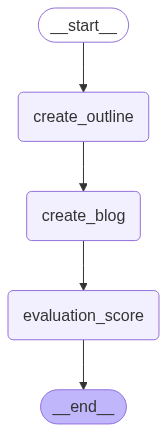

In [34]:
graph = StateGraph(BlogState)

# nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)
graph.add_node('evaluation_score', evaluate_blog)

# edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', 'evaluation_score')
graph.add_edge('evaluation_score', END)

# compile
workflow = graph.compile()

#
graph.compile()

In [35]:
# Execution

initial_state = {'title': "Rise of AI in Finance"}

output = (workflow.invoke(initial_state))

In [36]:
output.keys()

dict_keys(['title', 'outline', 'content', 'evaluation_score'])

In [37]:
print(output['outline'])

This is a fantastic challenge! Balancing the understanding and concerns of both kids and the elderly requires a gentle, clear, and reassuring tone, with simple analogies.

Here's an outline for a blog post titled "Rise of AI in Finance" that aims to be friendly and accessible to both demographics:

---

## Blog Title: **Smart Money Helpers: How AI is Changing Finance for Everyone!** 🤖💰

**(A Friendly Guide for Kids & Grandparents!)**

---

**I. Introduction: Meet Our New Smart Money Friends!**

*   **Hook for Kids:** "Imagine super-smart robots that can help you count your pocket money faster, or make sure your online game purchases are safe! That's a bit like what AI is doing in the world of money!"
*   **Hook for Elderly:** "Remember when banking meant long lines and lots of paperwork? Now, many things are simpler and safer, thanks to something called AI. It's like having a very efficient, helpful assistant for your money."
*   **What We'll Explore:** We'll discover what AI is, how i

In [38]:
print(output['content'])

Here's the detailed blog post based on your excellent outline, crafted to be friendly and accessible for both kids and grandparents!

---

## Smart Money Helpers: How AI is Changing Finance for Everyone! 🤖💰

**(A Friendly Guide for Kids & Grandparents!)**

Hello everyone! Have you ever wondered how your pocket money gets safely into your piggy bank, or how your bills get paid so smoothly each month? Well, there's a new, super-smart helper in the world of money, and it's called AI! Let's explore how this clever technology is making our financial lives easier and safer for *everyone*.

### I. Introduction: Meet Our New Smart Money Friends!

**For Kids:** Imagine super-smart robots that can help you count your pocket money faster, or make sure your online game purchases are safe! That's a bit like what AI is doing in the world of money! It's like having a super helper for your piggy bank.

**For Grandparents:** Remember when banking meant long lines, lots of paperwork, and maybe even a tr

In [41]:
print(output['evaluation_score'].content)

This blog post is truly excellent! It perfectly executes the challenging task of addressing both kids and grandparents in an accessible, friendly, and reassuring way.

**Numerical Score: 10/10**

Here's why:

*   **Exceptional Dual-Audience Approach:** You've masterfully woven in explanations and examples tailored specifically for kids and grandparents in every relevant section. This is the core challenge of the prompt, and you've nailed it consistently without feeling clunky or repetitive.
*   **Clear and Relatable Analogies:** The use of "super-smart robots," "piggy bank," "superhero guard," "money coach," "super-fast calculator," and "super-locked treasure chest" makes complex concepts incredibly easy to grasp for both demographics.
*   **Perfect Tone:** The tone is consistently friendly, reassuring, positive, and informative. It never talks down to either audience and successfully alleviates potential fears about AI.
*   **Comprehensive and Well-Structured:** You've followed the pr

In [19]:
# had we done this in langChain 
# we would have got only the output content not the outline :)